In [1]:
#to get auto matic reloading and inline editing 
%reload_ext autoreload
%autoreload 2 
%matplotlib inline

#my fast ai librariesh
from fastai.imports import  * 
from fastai.transforms import *
from fastai.torch_imports import *
from fastai.conv_learner import * 
from fastai.model import *
from fastai.dataset import * 
from fastai.sgdr import *
from fastai.plots import * 
torch.cuda.set_device(0)
import random 

In [4]:
PATH = "data/seedling/"
sz = 128
bs = 58
arch = resnet50

In [5]:
label_csv = f'{PATH}labels.csv'# load csv and get validation set
n = len(list(open(label_csv))) 
val_idx = get_cv_idxs(n)  
n

4751

In [6]:
def getdata(sz, bs):
    tfm = tfms_from_model(arch, sz, aug_tfms=transforms_top_down, max_zoom=1.1)
    data = ImageClassifierData.from_csv(PATH, 'train', f'{PATH}labels.csv', val_idxs = val_idx, tfms=tfm,
                                     test_name= 'test', 
                                        bs=bs, num_workers = 4)
    return data if sz >300 else data.resize(340, 'tmp')

In [ ]:
label = pd.read_csv(f'{PATH}labels.csv')
label.head
label.pivot_table(index='species', aggfunc = len).sort_values('file', ascending=False)

In [ ]:
data = getdata(sz,bs)

In [ ]:
fn = PATH+data.trn_ds.fnames[4];fn

In [ ]:
img=PIL.Image.open(fn);img

In [ ]:
tfm = tfms_from_model(arch, sz, aug_tfms=transforms_top_down, max_zoom=1.1)
data = ImageClassifierData.from_csv(PATH, 'train', f'{PATH}labels.csv', val_idxs = val_idx, tfms=tfm,
                                     test_name= 'test', bs=bs, num_workers = 4)

In [ ]:
#get size of image
size = {k: PIL.Image.open(PATH+k).size for k in data.trn_ds.fnames}
row_sz, col_sz = list(zip(*size.values()))
row_sz = np.array(row_sz)
col_sz= np.array(col_sz)
len(col_sz)

In [ ]:
plt.hist(row_sz[col_sz<200])

In [9]:
data = getdata(224,bs)

HBox(children=(IntProgress(value=0, max=6), HTML(value='')))

In [10]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [ ]:
lrf = learn.lr_find()
learn.predict()

In [ ]:
learn.sched.plot()

In [ ]:
learn.fit(1e-2,5)

In [ ]:
learn.fit(0.02, 5, cycle_len = 1)

In [ ]:
learn.precompute = False
learn.fit(1e-2, 5, cycle_len = 1)

In [ ]:
learn.save('seed_244')
learn.load('seed_244')
learn.unfreeze()
lr = 1e-2
lra = np.array([1e-3, 1e-3, lr])

In [ ]:
learn.fit(lra, 3, cycle_len=1, cycle_mult=2)

In [ ]:
learn.save('seed_244_moo2')

In [ ]:
learn.load('seed_244')
learn.unfreeze()
lr= 1e-2
lr = np.array([lr/18, lr/6, lr/2]); lr

In [7]:
learn.fit(lr, 3, cycle_len=1, cycle_mult =2)

NameError: name 'learn' is not defined

In [ ]:
log_preds, y = learn.TTA(is_test =True)
probs = np.exp(log_preds)
accuracy(log_preds,y)

In [ ]:
logs_preds_test = learn.predict(is_test=True)
logs_preds_test.shape


In [ ]:
log_probs_test = np.argmax(logs_preds_test, axis=1)
probs_test = np.argmax(log_preds, axis=1)

pred_class = [data.classes[i].replace('_', ' ') for i in log_probs_test]
pred_class2 = [data.classes[i].replace('_', ' ') for i in probs_test]


In [ ]:
submit_1 = pd.DataFrame({'file':os.listdir(f'{PATH}test'), 'species':pred_class})
submit_1.to_csv(f'{PATH}submission.csv', index=False)

In [ ]:
submit_2 = pd.DataFrame({'file':os.listdir(f'{PATH}test'), 'species':pred_class2})
submit_2.to_csv(f'{PATH}submission2.csv', index=False)

In [ ]:
learn.save('244_final')

In [ ]:
learn.set_data(getdata(249, bs))

In [ ]:
learn.fit(1e-2, 2, cycle_len=1)

In [ ]:
learn.set_data(getdata(299,bs))

In [ ]:
learn.save('299_')
learn.load('299_')

learn.fit(lr, 3,cycle_len=1, cycle_mult=2)

In [ ]:
log_preds, y = learn.TTA(is_test =True)
probs = np.exp(log_preds)
probs_test = np.argmax(log_preds, axis=1)
pred_class = [data.classes[i].replace('_', ' ') for i in probs_test]
submit_3= pd.DataFrame({'file':os.listdir(f'{PATH}test'), 'species':pred_class})
submit_3.to_csv(f'{PATH}submission3.csv', index=False)


In [ ]:
learn.freeze()
learn.save('300_final')
learn.fit(1e-2, 2, cycle_len=1)

In [ ]:
log_preds, y = learn.TTA(is_test =True)
probs = np.exp(log_preds)
probs_test = np.argmax(log_preds, axis=1)
pred_class = [data.classes[i].replace('_', ' ') for i in probs_test]
submit_3= pd.DataFrame({'file':os.listdir(f'{PATH}test'), 'species':pred_class})
submit_3.to_csv(f'{PATH}submission4.csv', index=False)

In [13]:
learn.precompute=False
learn.load('final')
learn.set_data(getdata(340, bs))
learn.fit(1e-2, 3, cycle_len = 1, cycle_mult = 2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

  0%|          | 0/66 [00:00<?, ?it/s]

/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/site-packages/torch/nn/modules/container.py:67: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


[0.      0.03846 0.19376 0.93518]                           
[1.      0.05045 0.17803 0.94459]                           
[2.      0.05056 0.18055 0.94191]                           
[3.      0.05058 0.16666 0.94864]                           
[4.      0.04915 0.17136 0.948  ]                           
[5.      0.05135 0.16375 0.95335]                           
[6.      0.04633 0.16545 0.94929]                           



In [14]:
log_preds, y = learn.TTA(is_test =True)
probs = np.exp(log_preds)
probs_test = np.argmax(log_preds, axis=1)
pred_class = [data.classes[i].replace('_', ' ') for i in probs_test]
submit_3= pd.DataFrame({'file':os.listdir(f'{PATH}test'), 'species':pred_class})
submit_3.to_csv(f'{PATH}submission5.csv', index=False)

/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/site-packages/torch/nn/modules/container.py:67: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


[[ 40  62  47 102  33  63 118  36  90  44  80  79]
 [  0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0]]


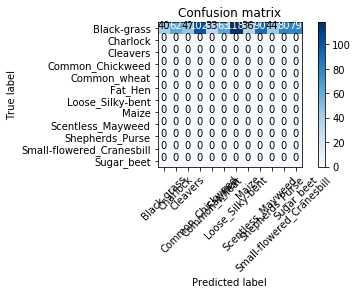

In [30]:
from sklearn.metrics import confusion_matrix
preds = np.argmax(log_preds, axis=1)

cm = confusion_matrix(y, preds)
plot_confusion_matrix(cm, data.classes)

In [31]:
learn.fit(1e-3, 3, cycle_len = 1, cycle_mult = 2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

  0%|          | 0/66 [00:00<?, ?it/s]

/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/site-packages/torch/nn/modules/container.py:67: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


[0.      0.03516 0.16396 0.94966]                           
[1.      0.04053 0.16328 0.94496]                           
[2.      0.04381 0.16497 0.94459]                           
[3.      0.04407 0.1677  0.94864]                           
[4.      0.043   0.16495 0.94966]                           
[5.      0.04172 0.16285 0.94763]                           
[6.      0.03874 0.16718 0.94662]                           



In [32]:
log_preds, y = learn.TTA(is_test =True)
probs = np.exp(log_preds)
probs_test = np.argmax(log_preds, axis=1)
pred_class = [data.classes[i].replace('_', ' ') for i in probs_test]
submit_3= pd.DataFrame({'file':os.listdir(f'{PATH}test'), 'species':pred_class})
submit_3.to_csv(f'{PATH}submission5.csv', index=False)

/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/site-packages/torch/nn/modules/container.py:67: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


In [33]:
learn.fit(1e-2, 3, cycle_len = 1, cycle_mult = 2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

  0%|          | 0/66 [00:00<?, ?it/s]

/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/site-packages/torch/nn/modules/container.py:67: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


[0.      0.03458 0.16451 0.94864]                           
[1.      0.04215 0.15447 0.94966]                           
[2.      0.04318 0.16432 0.94763]                           
[3.      0.03938 0.16379 0.94966]                           
[4.      0.0446  0.16565 0.95067]                           
[5.      0.03681 0.16773 0.94864]                           
[6.      0.03634 0.16624 0.94864]                           



In [34]:
log_preds, y = learn.TTA(is_test =True)
probs = np.exp(log_preds)
probs_test = np.argmax(log_preds, axis=1)
pred_class = [data.classes[i].replace('_', ' ') for i in probs_test]
submit_3= pd.DataFrame({'file':os.listdir(f'{PATH}test'), 'species':pred_class})
submit_3.to_csv(f'{PATH}submission5.csv', index=False)

/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/site-packages/torch/nn/modules/container.py:67: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


In [37]:
learn.fit(1e-2, 4, cycle_len = 1, cycle_mult = 2)

HBox(children=(IntProgress(value=0, description='Epoch', max=15), HTML(value='')))

  0%|          | 0/66 [00:00<?, ?it/s]

/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/site-packages/torch/nn/modules/container.py:67: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


[0.      0.02829 0.16639 0.95473]                           
[1.      0.03529 0.1736  0.95067]                           
[2.      0.03633 0.17191 0.95067]                           
[3.      0.0423  0.16778 0.95372]                           
[4.      0.04413 0.16178 0.94966]                           
[5.      0.03658 0.17213 0.9527 ]                           
[6.      0.03489 0.17271 0.95169]                           
[7.      0.03386 0.17446 0.95169]                           
[8.      0.03586 0.16814 0.9527 ]                           
[9.      0.0371  0.17441 0.95473]                           
[10.       0.03244  0.16535  0.95436]                       
[11.       0.03437  0.16524  0.95537]                       
[12.       0.03324  0.16499  0.9574 ]                       
[13.       0.03164  0.16504  0.95233]                       
[14.       0.03047  0.16644  0.95537]                       



In [38]:
log_preds, y = learn.TTA(is_test =True)
probs = np.exp(log_preds)
probs_test = np.argmax(log_preds, axis=1)
pred_class = [data.classes[i].replace('_', ' ') for i in probs_test]
submit_3= pd.DataFrame({'file':os.listdir(f'{PATH}test'), 'species':pred_class})
submit_3.to_csv(f'{PATH}submission6.csv', index=False)

/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/site-packages/torch/nn/modules/container.py:67: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


In [39]:
learn.save('final_one')